Code to analyse the boundary search done in the HMS O2 computing cluster.

In [1]:
import sys,os
sys.path.append("../bin")
from import_paths import path_to_eigen, path_to_utilsGRF, path_to_utilsGRF_
sys.path.append(path_to_utilsGRF_)
import AnalyseBoundarysearch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import BoundaryFinder as BF
import alphashape
import time

In [2]:
datafolder='/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb'
#datafolder="../clustersearch/"
subfolder="2021_12_13_N4Pol"
folder1=os.path.join(datafolder,subfolder)
ashapesfolder="./ashapes"
jid="45948375"
njobs=80
basename="N4P"

name_ashape="ashape_%s"%basename
extremespars=[[10**(-0.5),10**(0.5)],[1e-1,1e1],[1e-2,1e2],[1e-3,1e3],[1e-6,1e6]] #copy-paste from the boundary search
absder="True" #in this case it doesn´t matter because it is monotonically increasing


In [3]:
#check convergence
for i in range(1,njobs+1):
    fout=os.path.join(folder1,"%s_%d.out"%(jid,i))
    #print("##########",fout)
    lines=open(fout,"r").readlines()
    if len(lines)>1:
        line=lines[1]
        splitted=line.strip().split(",")
        #print(line)
        new=[]
        for k in range(1,len(splitted)-1,2):
            iter_=splitted[k]
            #print(iter_, iter_.split(" "))
            niter,nnew=[float(x.strip(".")) for x in iter_.split(" ")]
            new.append(nnew)
        #plt.figure(figsize=(4,3))
        #plt.scatter(range(len(new)),new)
        #plt.show()
        if len(new)<1500:
            print(i,"!!!not long enough", len(new), np.sum(new[-100:]),np.sum(new[-500:]))
        else:
            if np.sum(new[-1500:])==0:
                print(i,"ok",end=",")
            else:
                print(i,np.sum(new[-1500:]))
    else:
        print(i,"!!!not enough lines")

1 !!!not long enough 280 3.0 1886.0
2 ok,3 ok,4 ok,5 ok,6 ok,7 ok,8 ok,9 ok,10 ok,11 ok,12 ok,13 ok,14 ok,15 ok,16 ok,17 ok,18 ok,19 ok,20 ok,21 ok,22 ok,23 ok,24 ok,25 ok,26 ok,27 ok,28 ok,29 ok,30 ok,31 ok,32 ok,33 ok,34 ok,35 ok,36 ok,37 ok,38 ok,39 ok,40 ok,41 !!!not long enough 380 2.0 1958.0
42 !!!not long enough 285 5.0 3597.0
43 ok,44 ok,45 ok,46 ok,47 ok,48 ok,49 ok,50 ok,51 ok,52 ok,53 ok,54 ok,55 ok,56 ok,57 ok,58 ok,59 ok,60 ok,61 ok,62 ok,63 ok,64 ok,65 ok,66 ok,67 ok,68 ok,69 ok,70 ok,71 ok,72 ok,73 ok,74 ok,75 ok,76 ok,77 ok,78 ok,79 ok,80 ok,

In [1]:
0%5, 40%5, 41%5

(0, 0, 1)

In [4]:
checkf=os.path.join(datafolder,"2021_12_13_N4Pol/tocheck_N4P")
#tolerance 0.005
print(checkf)
command="wolframscript -file ../bin/N4Pol_count.wl '%s' '%s'"%(checkf,absder)  
! $command

/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2021_12_13_N4Pol/tocheck_N4P
First line
absder True
starting at
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2021_12_13_N4Pol/tocheck_N4P
Defined GRF
mat_N4P_10.in
mat_N4P_10_checked2.out

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.
1,
Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

General::stop: Further output of Solve::ratnz will be suppressed during this calculation.
2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,mat_N4P_36.in
mat_N4P_36_checked2.out
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,mat_N4P_46.in
mat_N4P_46_checked2.out
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

In [4]:
#doublecheck that the newly calculated mathematica doublecheck is the same as the original doublechecking
checkf="/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2021_12_13_N4Pol/tocheck_N4P"
checkedfiles1=[x for x in os.listdir(checkf) if ".out" in x and "checked" in x and not "checked2" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica
checkedfiles2=[x for x in os.listdir(checkf) if ".out" in x and "checked2" in x]
print(checkedfiles2)
parlims_nums=[[5, 10, 15, 20, 25, 30, 35, 45, 50, 55, 60, 65, 70, 75],
              [1, 6, 11, 16, 21, 26, 31, 36, 46, 51, 56, 61, 66, 71, 76],
             [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77],
             [3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78],
              [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79]] #copy-paste from what is printed above
             
              
             

['mat_N4P_39_checked2.out', 'mat_N4P_79_checked2.out', 'mat_N4P_48_checked2.out', 'mat_N4P_78_checked2.out', 'mat_N4P_38_checked2.out', 'mat_N4P_49_checked2.out', 'mat_N4P_44_checked2.out', 'mat_N4P_11_checked2.out', 'mat_N4P_43_checked2.out', 'mat_N4P_16_checked2.out', 'mat_N4P_6_checked2.out', 'mat_N4P_1_checked2.out', 'mat_N4P_56_checked2.out', 'mat_N4P_51_checked2.out', 'mat_N4P_67_checked2.out', 'mat_N4P_32_checked2.out', 'mat_N4P_60_checked2.out', 'mat_N4P_35_checked2.out', 'mat_N4P_75_checked2.out', 'mat_N4P_20_checked2.out', 'mat_N4P_72_checked2.out', 'mat_N4P_27_checked2.out', 'mat_N4P_50_checked2.out', 'mat_N4P_57_checked2.out', 'mat_N4P_17_checked2.out', 'mat_N4P_42_checked2.out', 'mat_N4P_10_checked2.out', 'mat_N4P_45_checked2.out', 'mat_N4P_7_checked2.out', 'mat_N4P_26_checked2.out', 'mat_N4P_73_checked2.out', 'mat_N4P_21_checked2.out', 'mat_N4P_74_checked2.out', 'mat_N4P_34_checked2.out', 'mat_N4P_61_checked2.out', 'mat_N4P_33_checked2.out', 'mat_N4P_66_checked2.out', 'ma

limits of parameters:,0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;

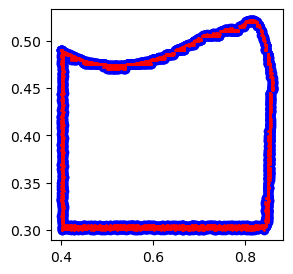

limits of parameters:,0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;

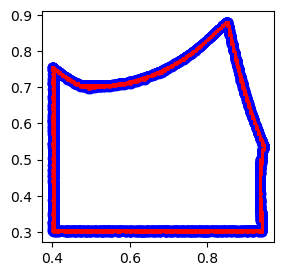

limits of parameters:,0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;

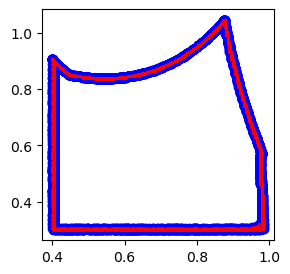

limits of parameters:,0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;

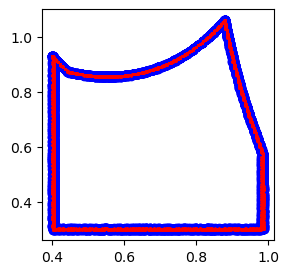

limits of parameters:,1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;

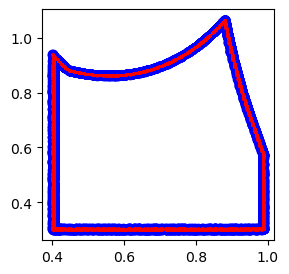

In [5]:
 
              
checked_pos_stp=[[] for x in range(len(parlims_nums))]
for plim in range(len(parlims_nums)):
    allpos=[]
    allrhos=[]
    allpos2=[]
    allrhos2=[]
    print("limits of parameters:", end=",")
    for f in checkedfiles1:
        #print(f)
        num=int(f.split("_")[2])
        #print(f,num)
        if num in parlims_nums[plim]:
            data=pd.read_csv(os.path.join(checkf,f),sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
            pos=data["pos"].values
            stp=data["rho"].values
            print(data.values[:,2:].min(),data.values[:,2:].max(),end=";")
            allpos.extend(pos)
            allrhos.extend(stp)
            
            data2=pd.read_csv(os.path.join(checkf,f.replace("checked","checked2")),sep=",|;",engine="python")
            pos2=data2["pos"].values
            stp2=data2["rho"].values
            allpos2.extend(pos2)
            allrhos2.extend(stp2)
    fig,ax=plt.subplots(1,1,figsize=(3,3))
    ax.scatter(allpos,allrhos,color="b")
    ax.scatter(allpos2,allrhos2,s=1,color="r")
    plt.show()
    checked_pos_stp[plim]=[allpos,allrhos]
    
    

In [6]:
sys.path.append("../bin")
from analyse_mathematica_results import analyse_file, print_statistics

In [7]:
tol=0.005
results=[x for x in os.listdir(checkf) if ".out" in x and "allcomparisons" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica
all_outputs=[]
for i in range(len(parlims_nums)): 
    print("looking at limits %d, %s"%(i,str(extremespars[i])))
    outputs=[]
    details_wrong=[]
    for f in results:
        num=int(f.split("_")[2])
        if num in parlims_nums[i]: 
            wrong_pos=analyse_file(os.path.join(checkf,f), outputs, details_wrong) #modifies (appends to) outputs and details_wrong
    all_outputs.append(outputs)

looking at limits 0, [0.31622776601683794, 3.1622776601683795]
looking at limits 1, [0.1, 10.0]
looking at limits 2, [0.01, 100.0]
looking at limits 3, [0.001, 1000.0]
looking at limits 4, [1e-06, 1000000.0]


looking at limits 0, [0.31622776601683794, 3.1622776601683795]
14
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 14
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
good statistics:
[254 256 256 255 256 254 255 255 254 256 255 255 256 255]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
14 jobs with [100, 101) % of coincident (same bin) points


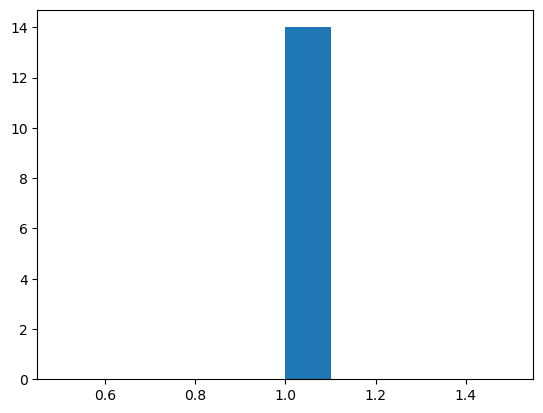

looking at limits 1, [0.1, 10.0]
15
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 15
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
good statistics:
[405 405 405 405 405 404 405 405 405 405 405 405 405 405 405]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
15 jobs with [100, 101) % of coincident (same bin) points


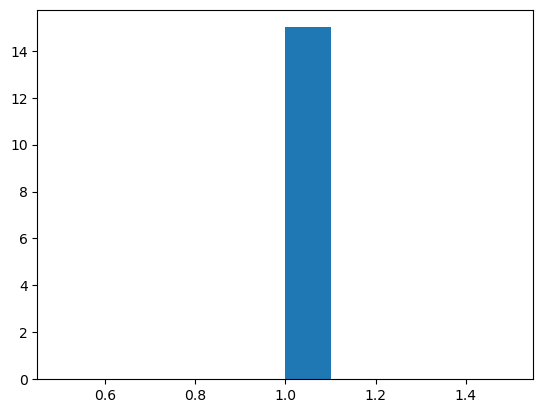

looking at limits 2, [0.01, 100.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
good statistics:
[485 482 484 484 484 484 484 484 482 484 480 484 484 483 483 483]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
16 jobs with [100, 101) % of coincident (same bin) points


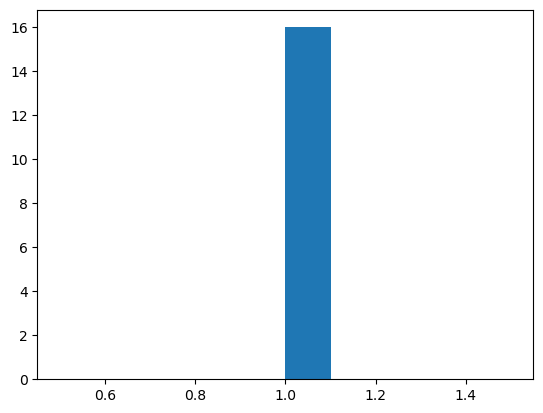

looking at limits 3, [0.001, 1000.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
good statistics:
[494 494 494 493 494 492 494 494 493 494 493 494 492 494 494 494]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
16 jobs with [100, 101) % of coincident (same bin) points


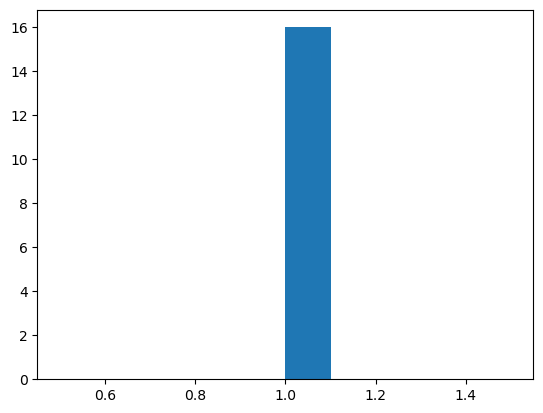

looking at limits 4, [1e-06, 1000000.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
good statistics:
[497 497 497 497 497 497 497 497 497 497 497 497 497 497 497 497]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
16 jobs with [100, 101) % of coincident (same bin) points


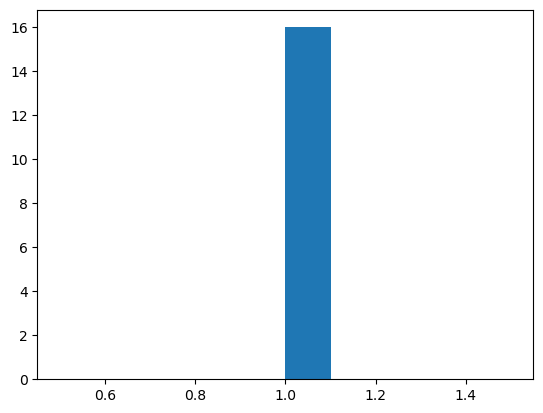

In [8]:
for i in range(len(parlims_nums)): #the last one has errors, but it is not needed as boundary already converged
    print("looking at limits %d, %s"%(i,str(extremespars[i])))
    print_statistics(all_outputs[i])